# **Data Science | Remote Internship | Oasis InfoByte**

## **Task No# 02: Unemployment Analysis with Python**

### **Perform Task**
 - Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour face. We have seen a sharp increase in the unemployment rate during Covid – 19, so analyzing the unemployment rate can be a good data science project.

 ---

### **Now Let's Start**
- **Analyzing the unemployment rate dataset and building a machine learning model  for prediction involves several steps. Below is a step-by-step guide using Python libraries like numpy, pandas, seaborn, matplotlib, and scikit-learn:**

---

## **Step 1: Import Libraries and Load Dataset**
 -  Necessary libraries such as numpy, pandas, seaborn, matplotlib, and scikit-learn are imported.
 - The unemployment dataset is loaded into a Pandas DataFrame.

#### **Import necessary libraries**

In [377]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### **Import the Dataset**

In [378]:
df = pd.read_csv("Unemployment in India.csv")

In [379]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## **Step 2: Data Exploration and Visualization**
 - Initial exploratory data analysis (EDA) is performed to understand the structure of the dataset.
 - Null values are identified and dropped to ensure data cleanliness.
 - The 'Date' column is converted to a datetime format, and a new 'Year' column is created.
 - Columns are renamed for clarity.
 - Various visualizations are generated using Seaborn and Matplotlib, including bar charts, box charts, multiple charts comparing unemployment rates and employed populations, pair plots, histograms, scatter plots, pie charts, and a bubble chart.

In [380]:
df.shape

(768, 7)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


#### **find Null values**

In [382]:
# find Null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

#### **Drop rows with null values**

In [383]:
# Drop rows with null values
df.dropna(inplace=True)

#### **find Null values**

In [384]:
# find Null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

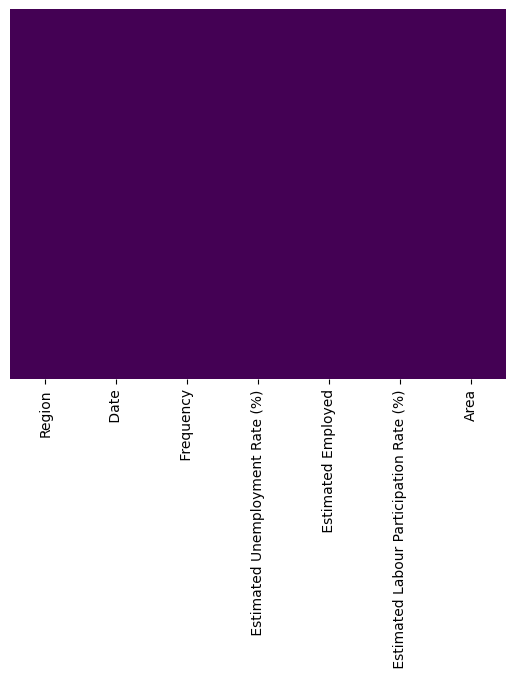

In [385]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

#### **Convert the "date" column to datetime format**

In [386]:
# Convert the "date" column to datetime format
df[' Date'] = pd.to_datetime(df[' Date'])

C:\Users\IRTIZA ZAIDI\AppData\Local\Temp\ipykernel_7476\1219685222.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


#### **Extract the year and create a new column**

In [387]:
# Extract the year and create a new column
df['Year'] = df[' Date'].dt.year

#### **Rename the 'old_name' column to 'new_name'**

In [388]:
# Rename the 'old_name' column to 'new_name'
df.rename(columns={' Date': 'Date',
                   ' Frequency': 'Frequency',
                   ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate(%)',
                   ' Estimated Employed':'Estimated Employed',
                   ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate(%)'}, 
          inplace=True)

In [389]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate(%),Estimated Employed,Estimated Labour Participation Rate(%),Area,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019


In [390]:
df.shape

(740, 8)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Region                                  740 non-null    object        
 1   Date                                    740 non-null    datetime64[ns]
 2   Frequency                               740 non-null    object        
 3   Estimated Unemployment Rate(%)          740 non-null    float64       
 4   Estimated Employed                      740 non-null    float64       
 5   Estimated Labour Participation Rate(%)  740 non-null    float64       
 6   Area                                    740 non-null    object        
 7   Year                                    740 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 49.1+ KB


In [392]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate(%)',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)', 'Area',
       'Year'],
      dtype='object')

#### **Summarize (Summary Statistics)**

In [393]:
# Summarize (Summary Statistics)
df.describe()

,Date,Estimated Unemployment Rate(%),Estimated Employed,Estimated Labour Participation Rate(%),Year
count,740,740.000000,7.400000e+02,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,2019.418919
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,2019.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,2019.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,2019.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,2020.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,2020.000000
std,NaN,10.721298,8.087988e+06,8.111094,0.493716


#### **Bar Chart of Unemployment Rate by Region**

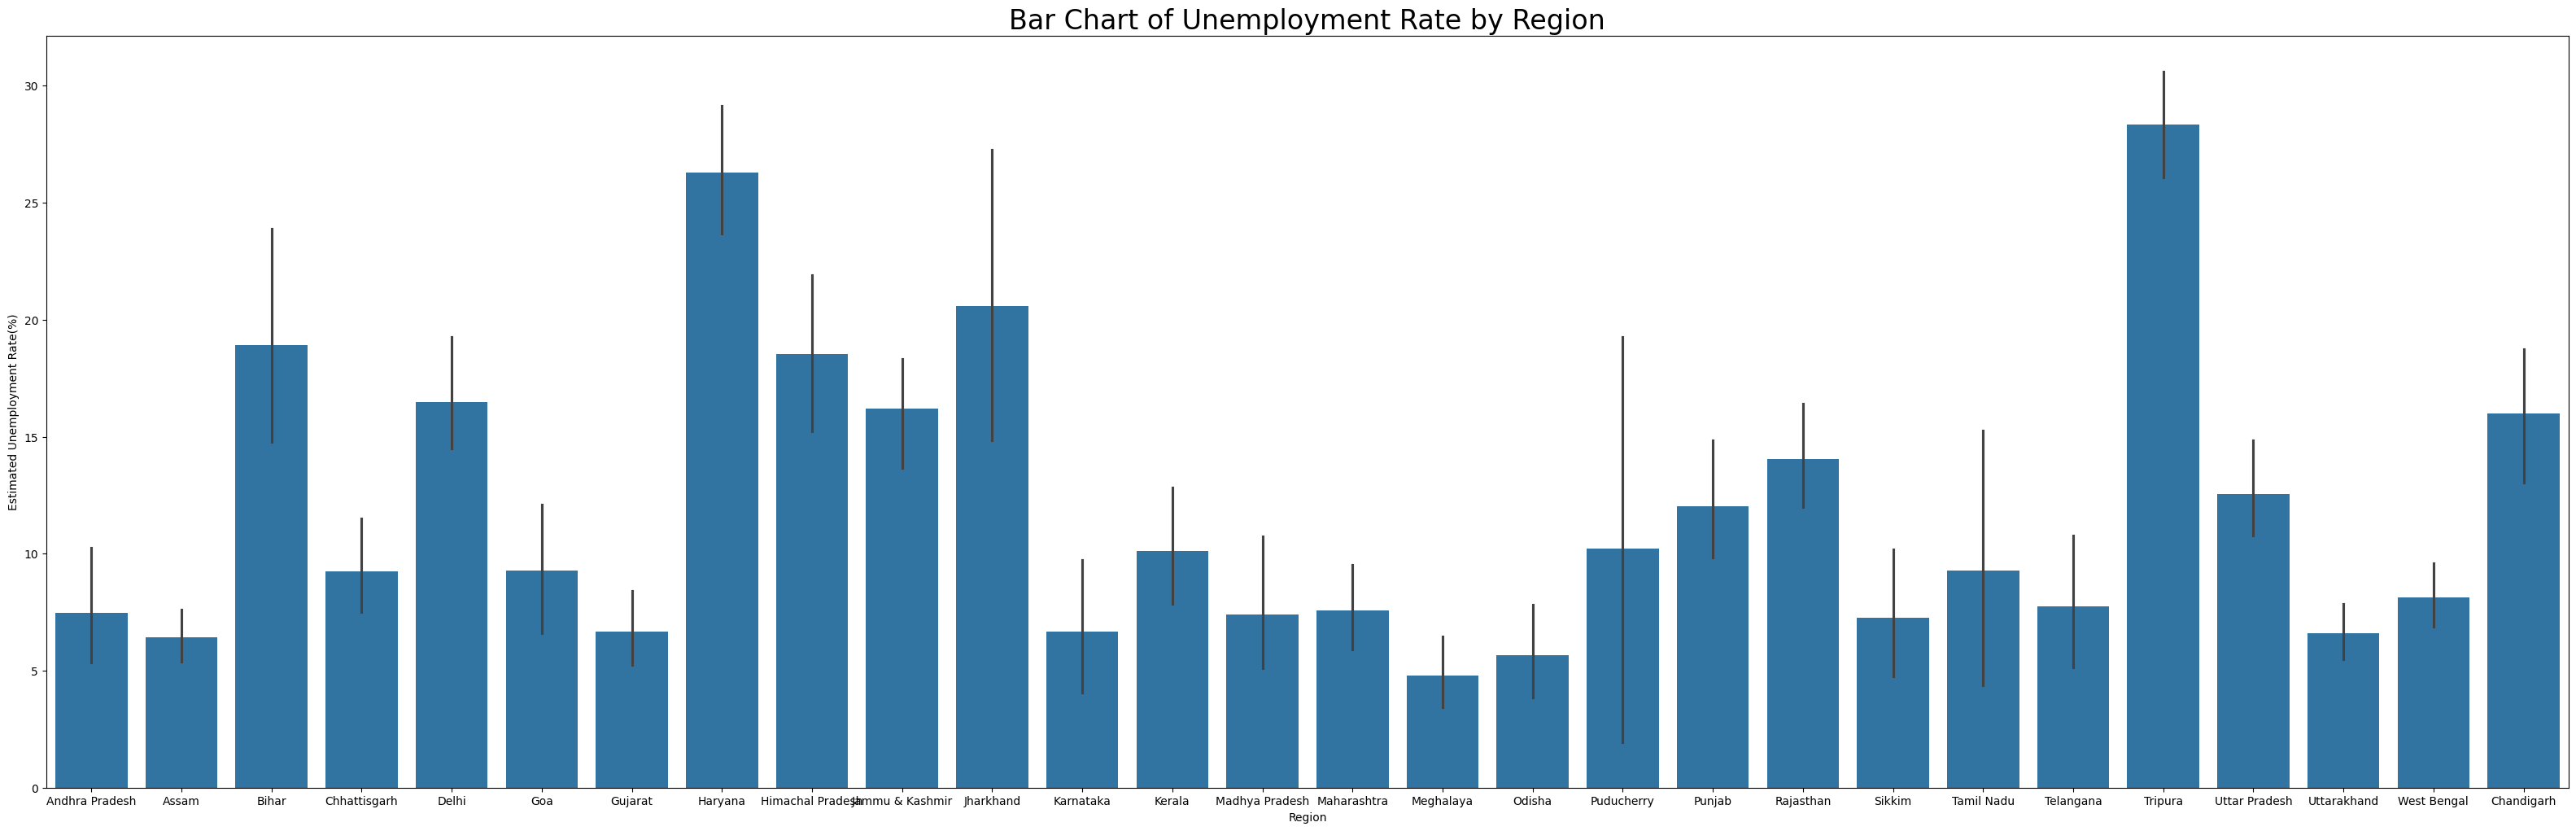

In [394]:
# Draw Bar Chart
plt.figure(figsize=(40, 12))
sns.barplot(x='Region', y='Estimated Unemployment Rate(%)', data=df)
plt.title('Bar Chart of Unemployment Rate by Region', fontsize = 24)
plt.show()

#### **Box Chart of Estimated Labour Participation Rate by Region**

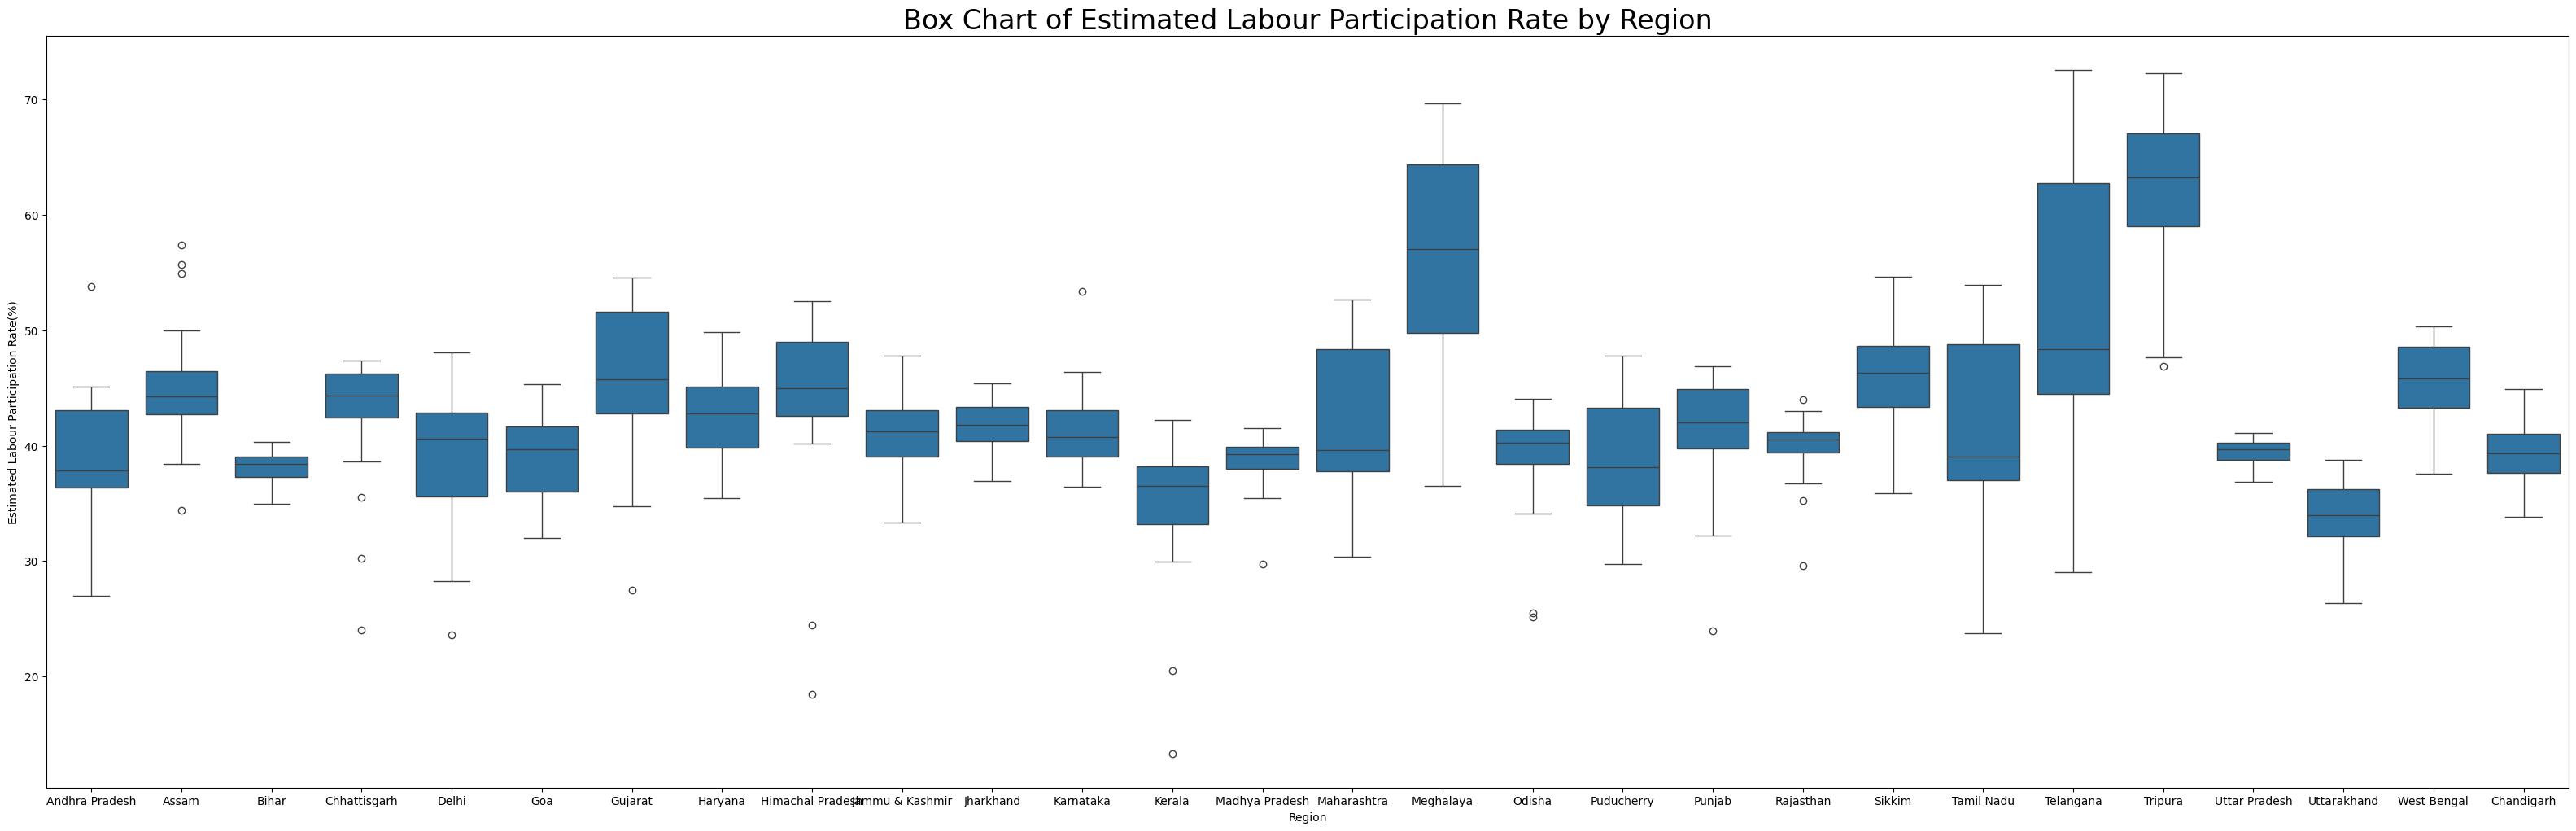

In [395]:
# Draw Box Chart
plt.figure(figsize=(40, 12))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate(%)', data=df)
plt.title('Box Chart of Estimated Labour Participation Rate by Region', fontsize = 24)
plt.show()

#### **Multiple Charts of Unemployment Rate & Employed Population by Region**

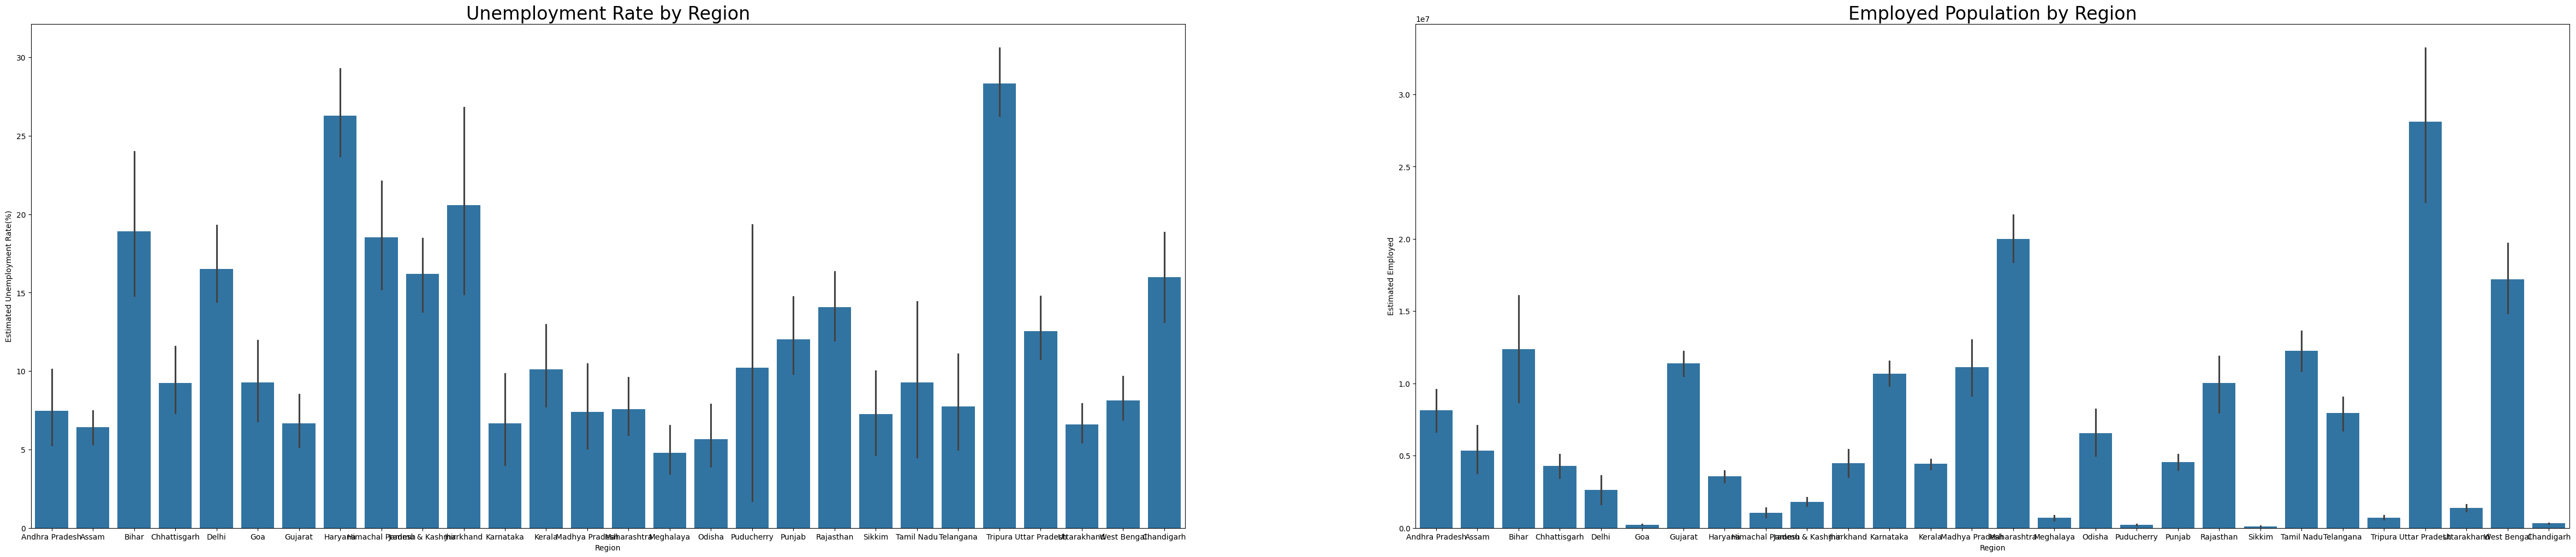

In [396]:
# Draw Multiple Charts
# Compare Estimated Unemployment Rate and Estimated Employed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(60, 12))
sns.barplot(x='Region', y='Estimated Unemployment Rate(%)', data=df, ax=ax1)
ax1.set_title('Unemployment Rate by Region', fontsize = 24)

sns.barplot(x='Region', y='Estimated Employed', data=df, ax=ax2)
ax2.set_title('Employed Population by Region', fontsize = 24)

plt.show()

#### **Pair Plot of Estimated Unemployement Rate, Estimated Employed and Estimated Labour  Participation Rate & Year by Region**

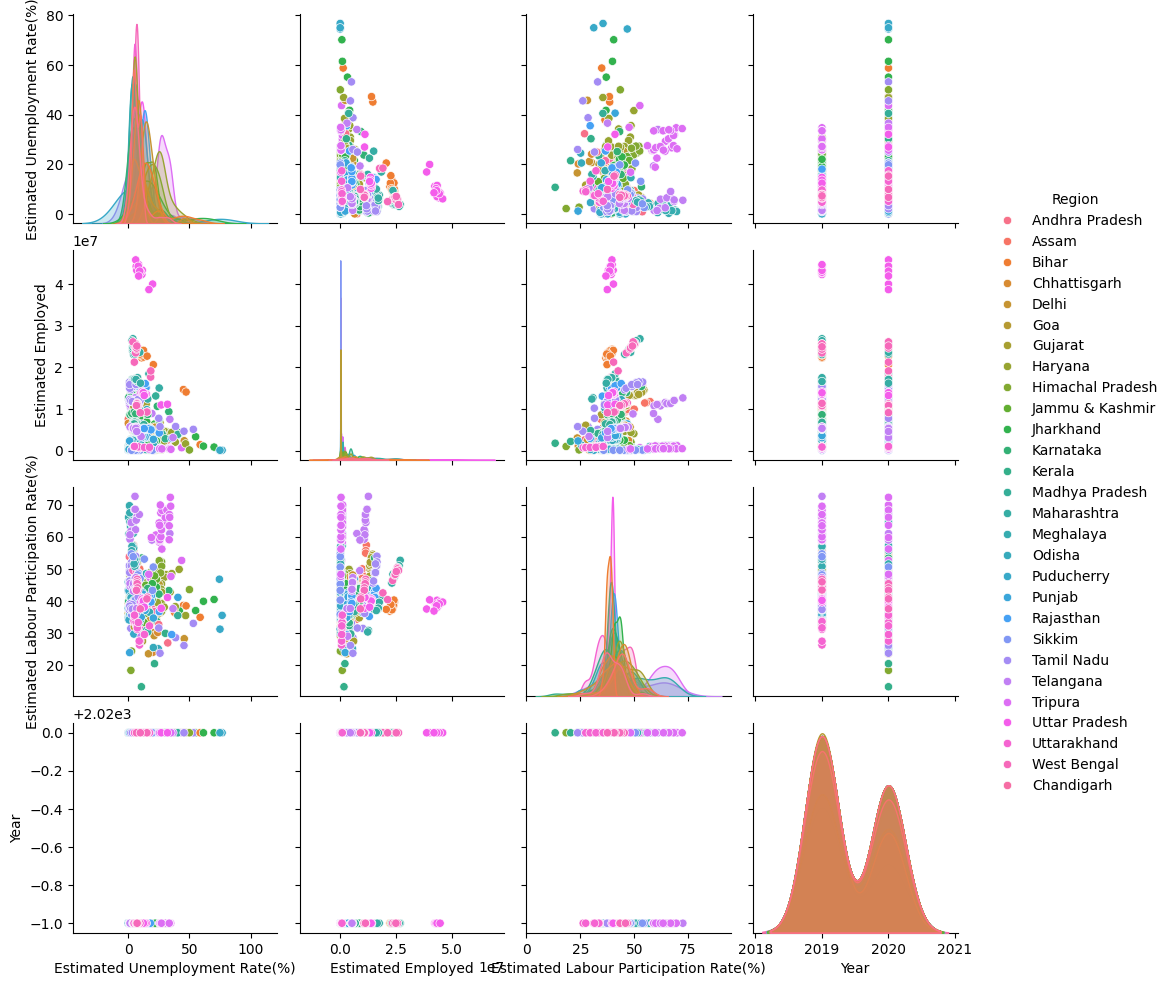

In [397]:
# Draw Pair Chart
sns.pairplot(df, hue = 'Region')
plt.show()

#### **Histogram of UnEmployment Rate**

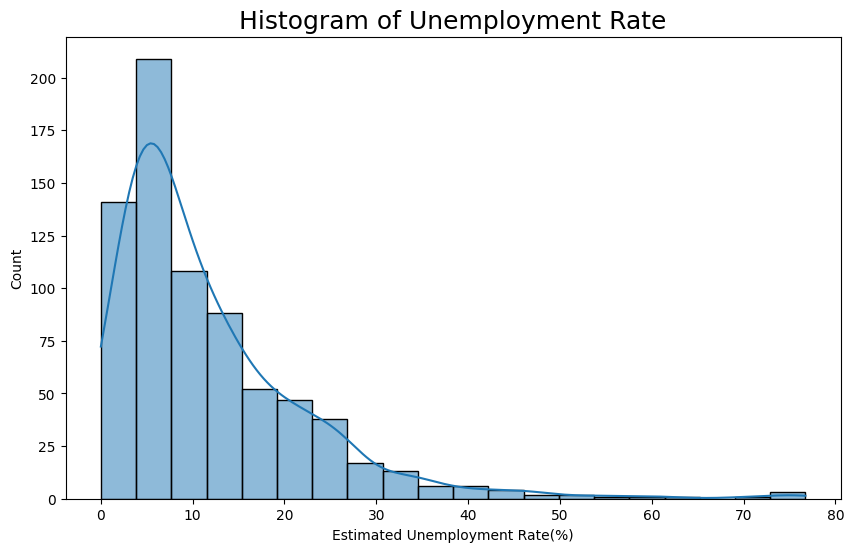

In [398]:
# Draw Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Unemployment Rate(%)'], bins=20, kde=True)
plt.title('Histogram of Unemployment Rate', fontsize=18)
plt.show()

#### **Scatter Plot between Employed and Unemployment Rate**

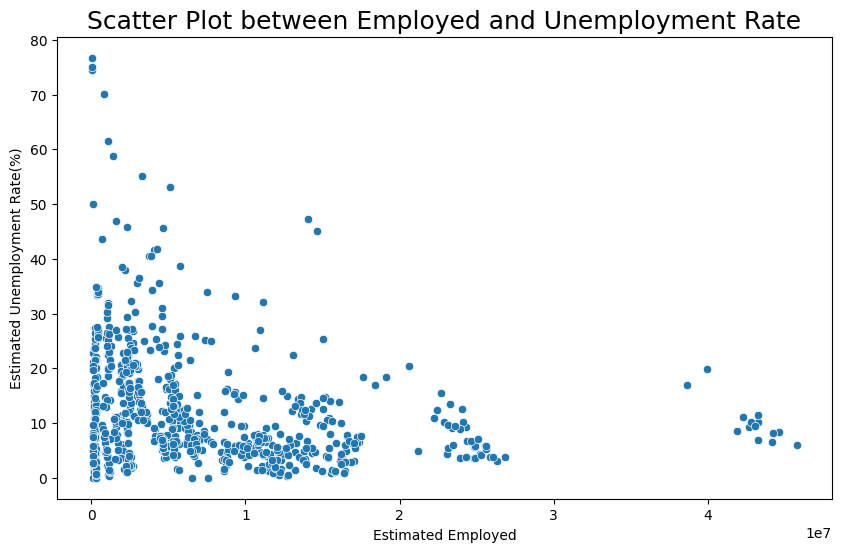

In [399]:
# Draw Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate(%)', data=df)
plt.title('Scatter Plot between Employed and Unemployment Rate', fontsize = 18)
plt.show()

#### **Pie Chart of Area Distribution**

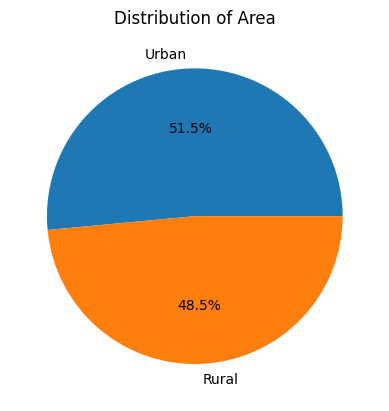

In [400]:
# Pie chart
region_distribution = df['Area'].value_counts()
plt.pie(region_distribution, labels=region_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Area')
plt.show()

#### **Bubble Chart of Employed vs Unemployment Rate**

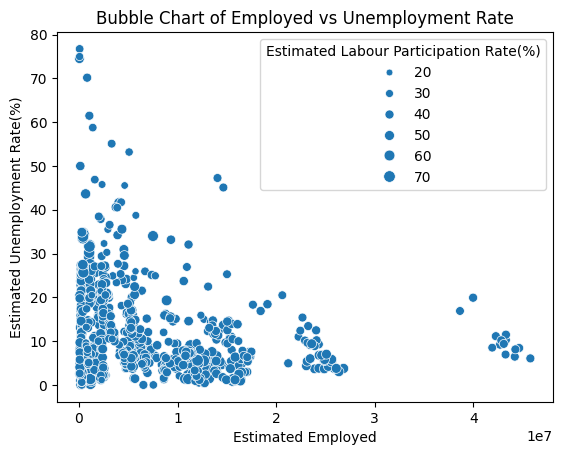

In [401]:
# Bubble chart (requires three numerical columns)
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate(%)', size='Estimated Labour Participation Rate(%)', data=df)
plt.title('Bubble Chart of Employed vs Unemployment Rate')
plt.show()

## **Step 3: Machine Learning Model**
 - Features (X) and the target variable (y) are defined.
 - The dataset is split into training and testing sets using scikit-learn's **train_test_split**.
 - Features are standardized using **StandardScaler** to ensure uniformity in scale.
 - A Linear Regression model is created using scikit-learn's **LinearRegression**.
 - The model is trained using the training data.
 - Predictions are made on the test set, and Mean Squared Error (MSE) is calculated as an evaluation metric.

#### **Prepare the data for the machine learning model**

In [402]:
# Prepare the data for the machine learning model
# Create matrix of features
X = df.drop(['Estimated Unemployment Rate(%)','Region','Date','Area','Frequency'], axis = 1) # grabs everything else but 'Estimated Unemployment Rate(%)'

# Create target variable

y = df['Estimated Unemployment Rate(%)'] # y is the column we're trying to predict

#### **X Represents the Features**

In [403]:
X

,Estimated Employed,Estimated Labour Participation Rate(%),Year
0,11999139.0,43.24,2019
1,11755881.0,42.05,2019
2,12086707.0,43.50,2019
3,12285693.0,43.97,2019
4,12256762.0,44.68,2019
...,...,...,...
749,10871168.0,44.09,2020
750,10806105.0,43.34,2020
751,9299466.0,41.20,2020
752,9240903.0,40.67,2020


In [404]:
# x Represents the Features
X.shape

(740, 3)

#### **y represents the Target**

In [405]:
y

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name: Estimated Unemployment Rate(%), Length: 740, dtype: float64

In [406]:
# y represents the Target
y.shape

(740,)

#### **Split the data into training and testing sets**

In [407]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [408]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("---"*10)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (592, 3)
Shape of y_train:  (592,)
------------------------------
Shape of X_test:  (148, 3)
Shape of y_test:  (148,)


#### **Standardize the features**

In [409]:
# Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### **Create a Linear Regression Model**

In [410]:
# Create a Linear Regression Model

print('Linear Regression')

linear_model = LinearRegression()

# Pass training data into model
linear_model.fit(X_train_scaled, y_train)


Linear Regression


LinearRegression()

#### **Make predictions on the test set**

In [411]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

#### **Evaluate the Linear Regression Model**

In [412]:
# Evaluate the Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 124.67071017904925


## **Step 4: Predict Using the Model**
 - Users are prompted to input values for estimated employment, labor participation rate, and year.
 - The user input is standardized using the same scaler applied to the training data.
 - The Linear Regression model predicts the unemployment rate based on the user input.

#### **User input for prediction**

In [413]:
# User input for prediction
user_input_employed = float(input("Enter the Value of Estimated Employed: "))
user_input_labor_participation = float(input("Enter the Value of Estimated Labour Participation Rate(%): "))
user_input_year = int(input("Enter the value of Year: "))

#### **Create a user input array**

In [414]:
# Create a user input array
user_input = np.array([[user_input_employed, user_input_labor_participation, user_input_year]])

#### **Standardize user input**

In [415]:
# Standardize user input
user_input_scaled = scaler.transform(user_input)

c:\Users\IRTIZA ZAIDI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### **Predict with the linear regression model**

In [416]:
# Predict with the linear regression model
linear_prediction = linear_model.predict(user_input_scaled)

In [417]:
print(f'Linear Regression Prediction: {linear_prediction[0]}')

Linear Regression Prediction: 5.788160944582808


## **Step 5: Conclusion:**

 - The code provides a comprehensive analysis of unemployment data, visually representing trends and relationships.
 - The machine learning model, in this case, Linear Regression, is trained and evaluated, and user input can be used to obtain predictions.

Overall, the code showcases a data science workflow, starting from data exploration and visualization to the implementation and evaluation of a machine learning model for predicting unemployment rates.